### Loading various libraries

In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import pandas as pd
import random
from sklearn.model_selection import GridSearchCV

### Importing the 20newsgroup training data

In [2]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
mydata_train = fetch_20newsgroups(subset='train', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [4]:
# Finding frequency of each category
targets, frequency = np.unique(mydata_train.target, return_counts=True)

In [5]:
targets_str = np.array(mydata_train.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


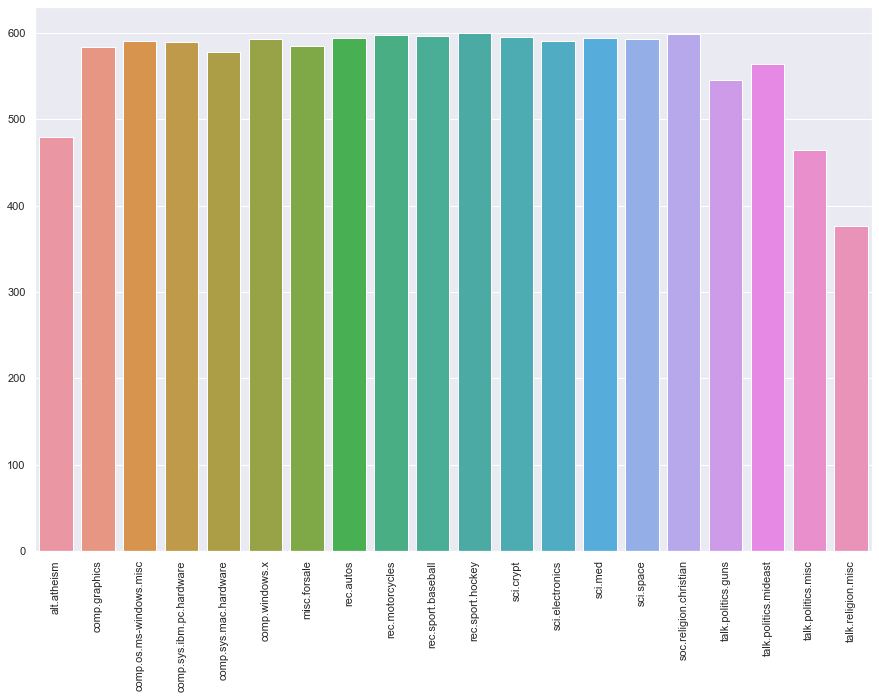

In [24]:
# Training data class distribution
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x = targets_str,y = frequency)
plt.xticks(rotation=90)
# Show the plot
plt.show()

We can see that all of the categories have decent amount of samples and doesn't have high imbalance. 

### Importing the 20newsgroup test data

In [26]:
# mydata_test = fetch_20newsgroups(subset='test', shuffle=True)
mydata_test = fetch_20newsgroups(subset='test', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [27]:
print('Testing data size:', len(mydata_test['data']))

Testing data size: 7532


In [28]:
# Finding frequency of each category
targets_test, frequency_test = np.unique(mydata_test.target, return_counts=True)
targets_test_str = np.array(mydata_test.target_names)
print(list(zip(targets_test_str, frequency_test)))

[('alt.atheism', 319), ('comp.graphics', 389), ('comp.os.ms-windows.misc', 394), ('comp.sys.ibm.pc.hardware', 392), ('comp.sys.mac.hardware', 385), ('comp.windows.x', 395), ('misc.forsale', 390), ('rec.autos', 396), ('rec.motorcycles', 398), ('rec.sport.baseball', 397), ('rec.sport.hockey', 399), ('sci.crypt', 396), ('sci.electronics', 393), ('sci.med', 396), ('sci.space', 394), ('soc.religion.christian', 398), ('talk.politics.guns', 364), ('talk.politics.mideast', 376), ('talk.politics.misc', 310), ('talk.religion.misc', 251)]


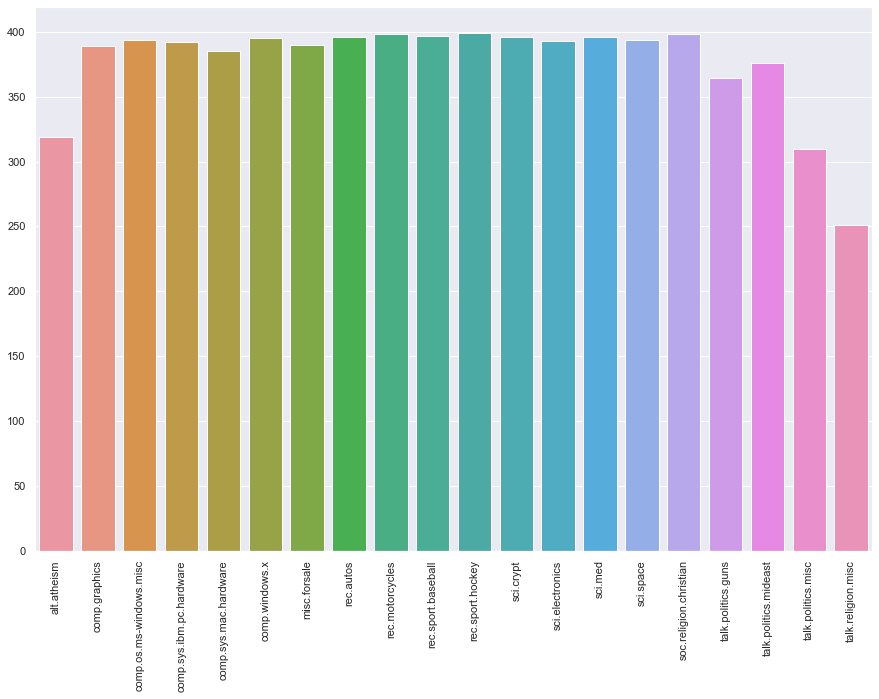

In [29]:
# Testing data class distribution
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x = targets_test_str,y = frequency_test)
plt.xticks(rotation=90)
# Show the plot
plt.show()

### Data Preparation: 

We will perform preparation steps such as Tokenization, Convert everything to lowercase, Removing stopwords, Stemming, Lemmatizing, and converting text data to a vector representation

In [18]:
mydata_train_df = pd.DataFrame({'data': mydata_train.data, 'target': mydata_train.target})
mydata_train_df.head()

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [19]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_train_df['data'] = mydata_train_df.data.map(alphanumeric).map(punc_lower)
mydata_train_df.head()

,data,target
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gh...,4
3,\ndo you have weitek s address phone number ...,1
4,from article world std com by tombaker ...,14


In [20]:
# Preparing test data
mydata_test_df = pd.DataFrame({'data': mydata_test.data, 'target': mydata_test.target})
mydata_test_df.head()

,data,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19


In [21]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_test_df['data'] = mydata_test_df.data.map(alphanumeric).map(punc_lower)
mydata_test_df.head()

,data,target
0,i am a little confused on all of the models of...,7
1,i m not familiar at all with the format of the...,5
2,\nin a word yes \n,0
3,\nthey were attacking the iraqis to drive them...,17
4,\ni ve just spent two solid months arguing tha...,19


### Count Vectorizer

In [22]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')

X_train_cv = count_vect.fit_transform(mydata_train_df.data)  # fit_transform learns the vocab and one-hot encodes
X_test_cv = count_vect.transform(mydata_test_df.data) # transform uses the same vocab and one-hot encodes

print(X_train_cv.shape)
print(type(X_train_cv))

(11314, 67822)
<class 'scipy.sparse.csr.csr_matrix'>


In [23]:
X_train_cv_df = pd.DataFrame(X_train_cv.todense())
X_train_cv_df.columns = sorted(count_vect.vocabulary_)
X_train_cv_df.head()

,aa,aaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,aaah,aaahh,aaahhhh,aaai,aacc,aachen,...,zznkjz,zznkzz,zznp,zzrk,zzz,zzzoh,zzzzzz,zzzzzzt,³ation,ýé
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Vectorizer

In [24]:
# Creating a document-term matrix using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfV = TfidfVectorizer(stop_words='english') 
# tfidfV = TfidfVectorizer(ngram_range=(1, 2), binary =True, stop_words='english') 

X_train_tfidfV = tfidfV.fit_transform(mydata_train_df.data) # fit_transform learns the vocab and one-hot encodes 
X_test_tfidfV = tfidfV.transform(mydata_test_df.data) # transform uses the same vocab and one-hot encodes 

# print the dimensions of the training set (text messages, terms) 
print(X_train_tfidfV.shape)
print(type(X_train_tfidfV))

(11314, 67822)
<class 'scipy.sparse.csr.csr_matrix'>


In [25]:
X_train_tfidfV_df = pd.DataFrame(X_train_tfidfV.todense())
X_train_tfidfV_df.columns = sorted(tfidfV.vocabulary_)
X_train_tfidfV_df.head()

,aa,aaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,aaah,aaahh,aaahhhh,aaai,aacc,aachen,...,zznkjz,zznkzz,zznp,zzrk,zzz,zzzoh,zzzzzz,zzzzzzt,³ation,ýé
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Classification Models

In [26]:

# Use a Naive Bayes model 
from sklearn.naive_bayes import MultinomialNB 

mnb = MultinomialNB() 

# Train the model 
y_train = mydata_train_df.target
mnb.fit(X_train_cv, y_train) 

MultinomialNB()

In [27]:
# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv data 
y_pred_cv_mnb = mnb.predict(X_test_cv) 
y_pred_cv_mnb # The output is all of the predictions

array([ 7,  1, 15, ..., 15,  3, 15])

In [28]:
from sklearn.metrics import classification_report, accuracy_score

y_test = mydata_test_df.target
print(accuracy_score(y_test, y_pred_cv_mnb))
print(classification_report(y_test, y_pred_cv_mnb))

0.6399362719065321
              precision    recall  f1-score   support

           0       0.60      0.36      0.45       319
           1       0.57      0.70      0.63       389
           2       0.67      0.01      0.02       394
           3       0.50      0.71      0.58       392
           4       0.72      0.58      0.64       385
           5       0.58      0.80      0.67       395
           6       0.85      0.66      0.75       390
           7       0.82      0.70      0.76       396
           8       0.90      0.65      0.75       398
           9       0.93      0.76      0.84       397
          10       0.58      0.92      0.71       399
          11       0.58      0.78      0.66       396
          12       0.67      0.49      0.57       393
          13       0.83      0.79      0.81       396
          14       0.76      0.75      0.76       394
          15       0.48      0.90      0.63       398
          16       0.55      0.65      0.60       364
        

## Using pipeline now onwards to do the modeling

## I. Not using Stemming and Lemmatization 

### 1. Terms in TF-IDF Vectorizer are unigrams (single words)

- we are training the follwoing models by not using the stemming and lemmatization
#### Naive Bayes
#### Logistic Regression
#### Stochastic Gradient Descent Classifier
#### KNN

In [31]:
# Naive Bayes
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', MultinomialNB())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Naive Bayes',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# Logistic regression
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Logistic Regression',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# Stochastic Gradient Descent Classifier
random.seed(1)
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', SGDClassifier())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Stochastic Gradient Descent Classifier',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# KNN
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier(n_neighbors=100))])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of KNN',text_clf.score(mydata_test_df.data, mydata_test_df.target))

Accuracy of Naive Bayes 0.6692777482740307
Accuracy of Logistic Regression 0.6901221455124801
Accuracy of Stochastic Gradient Descent Classifier 0.6978226234731811
Accuracy of KNN 0.05284121083377589


**Parameters Tuning of Logistic Regression**

In [32]:

# Performing Grid Search to find best LR parameters
pipeline = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # MultinomialNB, LogisticRegression, SGDClassifier

parameters = {
       'clf__penalty': ('l1', 'l2')
}

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(mydata_train_df.data, mydata_train_df.target)

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 1461, in 

GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words='english',
                                                        sublinear_tf=True)),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__penalty': ('l1', 'l2')})

In [34]:
# grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)
print('Best parameters = ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
    # Test Accuracy
grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

Best training score 0.7415
Best parameters = 
clf__penalty: 'l2'


0.6901221455124801

**Parameters Tuning of KNN**

In [35]:

# Performing Grid Search to find best kNN parameters
pipeline = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier())])  # MultinomialNB, LogisticRegression, SGDClassifier

parameters = {
       'clf__n_neighbors': (5, 10, 100, 200),
       'clf__weights': ('uniform', 'distance')
}

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(mydata_train_df.data, mydata_train_df.target)

GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words='english',
                                                        sublinear_tf=True)),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': (5, 10, 100, 200),
                         'clf__weights': ('uniform', 'distance')})

In [36]:
# grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)
print('Best parameters = ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
print('Accuracy on testing data')
# Test Accuracy
grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

Best training score 0.1197
Best parameters = 
clf__n_neighbors: 5
clf__weights: 'distance'
Accuracy on testing data


0.08576739245884227

### 2. Terms in TF-IDF Vectorizer are unigrams and bigrams, and values are binary values

- we will again training the follwoing models by not using the stemming and lemmatization
#### Naive Bayes
#### Logistic Regression
#### Stochastic Gradient Descent Classifier
#### KNN

In [37]:
# Naive Bayes
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', MultinomialNB())])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Naive Bayes',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# Logistic Regression
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression(random_state=42))])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Logistic Regression',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# Stochastic Gradient Descent Classifier
random.seed(1)
# Performance of SGD Classifier with No Stemming & Lemmatization, and ngram_range = (1,2)
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', SGDClassifier())])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Stochastic Gradient Descent Classifier',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# KNN
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier(n_neighbors=100))])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of KNN',text_clf.score(mydata_test_df.data, mydata_test_df.target))

Accuracy of Naive Bayes 0.6557355284121084
Accuracy of Logistic Regression 0.6834838024429103
Accuracy of Stochastic Gradient Descent Classifier 0.705124800849708
Accuracy of KNN 0.05138077535847053


**Parameters tuning of Logistic Regression**

In [38]:
%%time
# Performing Grid Search to find best LR parameters
pipeline = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression(random_state=42))])  # MultinomialNB, LogisticRegression, SGDClassifier

parameters = {
       'clf__penalty': ('l1', 'l2')
}

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(mydata_train_df.data, mydata_train_df.target)

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 1461, in 

Wall time: 16min 43s


GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(binary=True,
                                                        ngram_range=(1, 2),
                                                        stop_words='english',
                                                        sublinear_tf=True)),
                                       ('clf',
                                        LogisticRegression(random_state=42))]),
             param_grid={'clf__penalty': ('l1', 'l2')})

In [39]:
# grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)
print('Best parameters = ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
print('Testing Accuracy')
# Test Accuracy
grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

Best training score 0.7306


**Parameters Tuning of KNN**

In [44]:
%%time
# Performing Grid Search to find best kNN parameters
pipeline = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier())])  # MultinomialNB, LogisticRegression, SGDClassifier

parameters = {
       'clf__n_neighbors': (5, 10, 100, 200),
       'clf__weights': ('uniform', 'distance')
}

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(mydata_train_df.data, mydata_train_df.target)

Wall time: 3min 34s


GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(binary=True,
                                                        ngram_range=(1, 2),
                                                        stop_words='english',
                                                        sublinear_tf=True)),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': (5, 10, 100, 200),
                         'clf__weights': ('uniform', 'distance')})

In [38]:
# grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)
print('Best parameters = ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
print('Testing accuracy')
# Test Accuracy
grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

Best training score 0.1197
Best parameters = 
clf__n_neighbors: 5
clf__weights: 'distance'
Testing accuracy


0.08576739245884227

## II. Using Stemming
Now we'll use stemming technique, i.e. cutting the words to their root form. We use Snowball english stemmer algorithm from the nltk package. We define a class to represent the Snowball stemmer as follows.

In [39]:
stemmer = SnowballStemmer('english', ignore_stopwords=True)

class StemmedTfidfVectorizer(TfidfVectorizer):
    
    def __init__(self, stemmer, *args, **kwargs):
        super(StemmedTfidfVectorizer, self).__init__(*args, **kwargs)
        self.stemmer = stemmer
        
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (self.stemmer.stem(word) for word in analyzer(doc.replace('\n', ' ')))

### 1. Terms in TF-IDF Vectorizer are unigrams (single words)
First we will apply stemming to extract only unigrams from the text data to form the vectorizer.
- we will again training the follwoing models by applying the stemming
#### Naive Bayes
#### Logistic Regression
#### Stochastic Gradient Descent Classifier
#### KNN

In [40]:
# Naive Bayes
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', MultinomialNB())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Naive Bayes',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# Logistic Regression
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Logistic Regression',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# Stochastic Gradient Descent Classifier
random.seed(1)
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', SGDClassifier())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Stochastic Gradient Descent Classifier',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# KNN
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier(n_neighbors=5, weights='distance'))])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of KNN',text_clf.score(mydata_test_df.data, mydata_test_df.target))

Accuracy of Naive Bayes 0.6648964418481147
Accuracy of Logistic Regression 0.6901221455124801
Accuracy of Stochastic Gradient Descent Classifier 0.6991502920870951
Accuracy of KNN 0.08404142326075412


### 2. Terms in TF-IDF Vectorizer are unigrams and bigrams, and values are binary values
Now we will extract unigrams as well as bigrams from the text to form the TF-IDF vectorizer.

- we will again training the follwoing models by by extracting the unigrams and bigrams
#### Naive Bayes
#### Logistic Regression
#### Stochastic Gradient Descent Classifier
#### KNN

In [41]:
# Naive Bayes
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', MultinomialNB())])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Naive Bayes',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# Logistic Regression
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Logistic Regression',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# Stochastic Gradient Descent Classifier
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', SGDClassifier())])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Stochastic Gradient Descent Classifier',text_clf.score(mydata_test_df.data, mydata_test_df.target))
print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))
# KNN
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier(n_neighbors=5, weights='distance'))])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of KNN',text_clf.score(mydata_test_df.data, mydata_test_df.target))

Naive Bayes 0.6558682952734998
Accuracy of Logistic Regression 0.6836165693043016
Accuracy of Stochastic Gradient Descent Classifier 0.7085767392458843
              precision    recall  f1-score   support

           0       0.60      0.44      0.51       319
           1       0.67      0.70      0.68       389
           2       0.65      0.63      0.64       394
           3       0.72      0.65      0.68       392
           4       0.76      0.73      0.74       385
           5       0.78      0.75      0.76       395
           6       0.72      0.83      0.77       390
           7       0.80      0.71      0.75       396
           8       0.83      0.75      0.79       398
           9       0.55      0.88      0.68       397
          10       0.87      0.91      0.89       399
          11       0.79      0.75      0.77       396
          12       0.66      0.56      0.61       393
          13       0.80      0.81      0.80       396
          14       0.76      0.79    

## III. Using Lemmatization
Now we apply lemmatization, i.e. getting grammatically correct normal form of the word with the use of morphology. We will use WordNetLemmatizer from nltk package and part-of-speech word tagging. We define the class LemmaTokenizer as follows.

In [42]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

### 1. Terms in TF-IDF Vectorizer are unigrams (single words)
First we will apply lemmetization to extract only unigrams from the text data to form the vectorizer.

- we will again training the follwoing models with lemmatization
#### Naive Bayes
#### Logistic Regression
#### Stochastic Gradient Descent Classifier
#### KNN

In [43]:
# Naive Bayes
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', MultinomialNB())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Naive Bayes',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# Logistic Regression
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Logistic Regression',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# Stochastic Gradient Descent Classifier
random.seed(1)
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', SGDClassifier())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Stochastic Gradient Descent Classifier',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# KNN
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier(n_neighbors=100))])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of KNN',text_clf.score(mydata_test_df.data, mydata_test_df.target))

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


Accuracy of Naive Bayes 0.6687466808284652


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


Accuracy of Logistic Regression 0.6911842804036112


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


Accuracy of Stochastic Gradient Descent Classifier 0.7016728624535316


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


Accuracy of KNN 0.05377057886351567


- Lets try some other models, we will train the follwoing models 
### XGBoost
### ADABoost
### Gradient Boost
### Random Forest
### Decision Tree

In [44]:
from xgboost import XGBClassifier

In [45]:
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', XGBClassifier(n_neighbors=100))])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of KNN',text_clf.score(mydata_test_df.data, mydata_test_df.target))

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of KNN 0.6078066914498141


In [46]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

In [49]:
# ADABoost
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', AdaBoostClassifier())]) 

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of AdaBoost',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# Gradient Boosting
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', GradientBoostingClassifier())]) 

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Gradient Boosting',text_clf.score(mydata_test_df.data, mydata_test_df.target))
# Random Forest
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', RandomForestClassifier())]) 

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Random Forest',text_clf.score(mydata_test_df.data, mydata_test_df.target))

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


Accuracy of AdaBoost 0.39338821030270843


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


Accuracy of Gradient Boosting 0.5989113117365905


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


Accuracy of Random Forest 0.6257302177376527


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', DecisionTreeClassifier())]) 

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print('Accuracy of Random Forest',text_clf.score(mydata_test_df.data, mydata_test_df.target))

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


Accuracy of Random Forest 0.44503451938396177
